In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
from citipy import citipy

In [5]:
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


608

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        # Log the URL, record, and set numbers and the city.
       
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | konch
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | vila
Processing Record 5 of Set 1 | yulara
Processing Record 6 of Set 1 | thunder bay
Processing Record 7 of Set 1 | verkhnevilyuysk
Processing Record 8 of Set 1 | kimberley
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | kiunga
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | hami
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | brae
Processing Record 20 of Set 1 | riyadh
Processing Record 21 of Set 1 | monte alegre
Processing Record 22 of Set 1 | leh
Processing Record 23 of Set 1 | xuzhou
Processing Record 24 of Set 1 | samusu
City not found. Skipping..

Processing Record 43 of Set 4 | burgeo
Processing Record 44 of Set 4 | palafrugell
Processing Record 45 of Set 4 | saint-leu
Processing Record 46 of Set 4 | dublin
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | mayumba
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | saint-augustin
Processing Record 4 of Set 5 | uchiza
Processing Record 5 of Set 5 | kano
Processing Record 6 of Set 5 | guerrero negro
Processing Record 7 of Set 5 | luganville
Processing Record 8 of Set 5 | russkaya polyana
Processing Record 9 of Set 5 | labuhan
Processing Record 10 of Set 5 | nizwa
Processing Record 11 of Set 5 | gondanglegi
Processing Record 12 of Set 5 | grindavik
Processing Record 13 of Set 5 | thompson
Processing Record 14 of Set 5 | dingli
Processing Record 15 of Set 5 | sangmelima
Processing Record 16 of Set 5 | barrow
Processing Record 1

Processing Record 37 of Set 8 | solnechnyy
Processing Record 38 of Set 8 | zyryanka
Processing Record 39 of Set 8 | banda aceh
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | jalu
Processing Record 42 of Set 8 | awjilah
Processing Record 43 of Set 8 | vestmannaeyjar
Processing Record 44 of Set 8 | marienburg
Processing Record 45 of Set 8 | balkhash
Processing Record 46 of Set 8 | mglin
Processing Record 47 of Set 8 | byron bay
Processing Record 48 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 8 | itupiranga
Processing Record 50 of Set 8 | atlantis
Processing Record 1 of Set 9 | narsaq
Processing Record 2 of Set 9 | hvide sande
Processing Record 3 of Set 9 | camacha
Processing Record 4 of Set 9 | bisira
Processing Record 5 of Set 9 | yatou
Processing Record 6 of Set 9 | languyan
Processing Record 7 of Set 9 | havre-saint-pierre
Processing Record 8 of Set 9 | kedrovka
Processing Record 9 of Set 9 | aksu
Processing Record 10 of Set 9 | d

Processing Record 19 of Set 12 | cape canaveral
Processing Record 20 of Set 12 | lazaro cardenas
Processing Record 21 of Set 12 | koungou
Processing Record 22 of Set 12 | mahibadhoo
Processing Record 23 of Set 12 | kahului
Processing Record 24 of Set 12 | gurupi
Processing Record 25 of Set 12 | hefei
Processing Record 26 of Set 12 | verkhoyansk
Processing Record 27 of Set 12 | terme
Processing Record 28 of Set 12 | coihaique
Processing Record 29 of Set 12 | comodoro rivadavia
Processing Record 30 of Set 12 | owando
Processing Record 31 of Set 12 | kidal
Processing Record 32 of Set 12 | altamira
Processing Record 33 of Set 12 | chongwe
Processing Record 34 of Set 12 | pangkalanbuun
Processing Record 35 of Set 12 | conceicao do araguaia
Processing Record 36 of Set 12 | lima
Processing Record 37 of Set 12 | carutapera
Processing Record 38 of Set 12 | gourdon
Processing Record 39 of Set 12 | bose
Processing Record 40 of Set 12 | gallup
Processing Record 41 of Set 12 | longyearbyen
Processi

In [9]:
len(city_data)

560

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,88,75,10.36,TO,2022-07-18 21:59:18
1,Konch,25.9833,79.1500,93.24,47,92,6.26,IN,2022-07-18 22:02:10
2,Busselton,-33.6500,115.3333,50.29,86,0,8.68,AU,2022-07-18 22:02:10
3,Vila,42.0304,-8.1588,58.08,83,7,4.76,PT,2022-07-18 22:02:11
4,Yulara,-25.2406,130.9889,48.16,29,0,7.18,AU,2022-07-18 22:02:12
5,Thunder Bay,48.4001,-89.3168,81.86,48,72,6.69,CA,2022-07-18 22:00:06
6,Verkhnevilyuysk,63.4453,120.3167,63.36,88,100,4.76,RU,2022-07-18 22:02:13
7,Kimberley,-28.7323,24.7623,52.03,48,0,7.65,ZA,2022-07-18 22:02:13
8,Hasaki,35.7333,140.8333,81.00,85,100,13.22,JP,2022-07-18 22:02:14
9,Kiunga,-6.1219,141.2906,72.79,99,100,0.45,PG,2022-07-18 22:02:14


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-07-18 21:59:18,-21.2000,-175.2000,75.36,88,75,10.36
1,Konch,IN,2022-07-18 22:02:10,25.9833,79.1500,93.24,47,92,6.26
2,Busselton,AU,2022-07-18 22:02:10,-33.6500,115.3333,50.29,86,0,8.68
3,Vila,PT,2022-07-18 22:02:11,42.0304,-8.1588,58.08,83,7,4.76
4,Yulara,AU,2022-07-18 22:02:12,-25.2406,130.9889,48.16,29,0,7.18


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

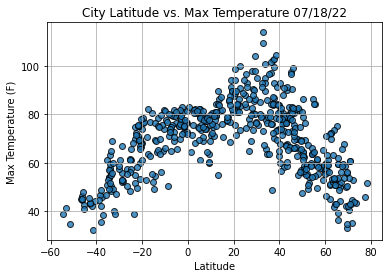

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

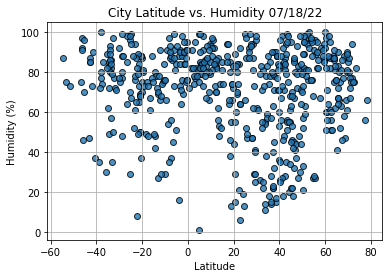

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

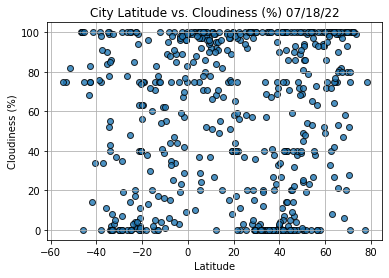

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

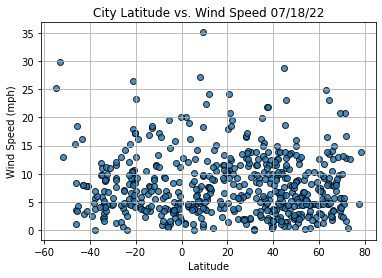

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()